In [64]:
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory
import os
import matplotlib.pyplot as plt


In [65]:
# Load the dataset
df = pd.read_csv('/Users/joaovictormachado/Desktop/Eyesense/DataSet/Ocular_Disease_Recognition/full_df.csv')

In [66]:
# Display the first 5 rows of the dataset
df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
df.sort_values("ID")

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
3194,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",0_left.jpg
3195,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_left.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg
3192,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_right.jpg
3193,4784,58,Male,4784_left.jpg,4784_right.jpg,hypertensive retinopathy，age-related macular d...,hypertensive retinopathy，age-related macular d...,0,0,0,0,1,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",4784_right.jpg


In [68]:
data_age = ['Patient Age']
data_sex = ['Patient Sex']

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

<AxesSubplot:ylabel='ID'>

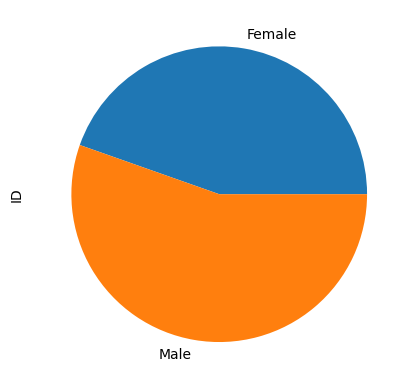

In [70]:
df.groupby("Patient Sex")["ID"].sum().plot.pie()

<AxesSubplot:ylabel='Frequency'>

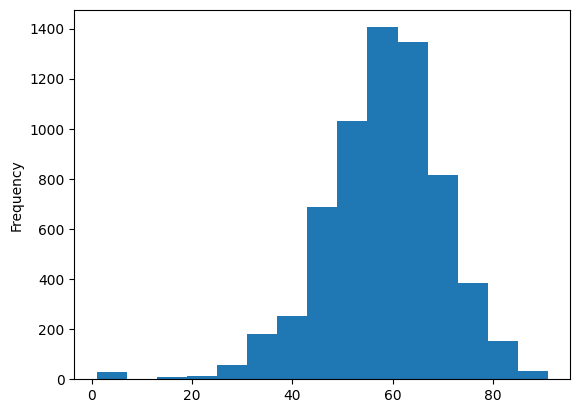

In [71]:
df["Patient Age"].plot.hist(bins=15)

<AxesSubplot:ylabel='ID'>

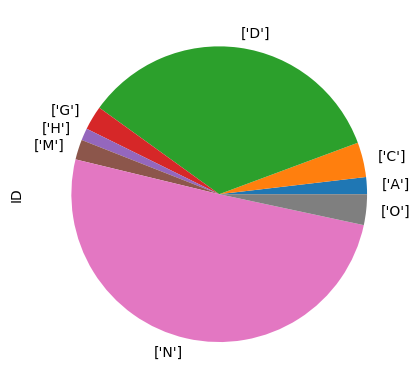

In [72]:
df.groupby("labels")["ID"].sum().plot.pie()

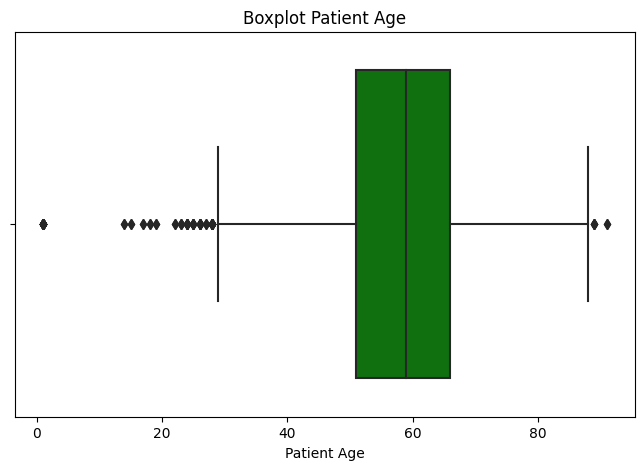

In [73]:
#Boxplot de Patient Age

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Patient Age'], color="green")
plt.title("Boxplot Patient Age")
plt.show()

In [74]:
#Patient Age using IQR (Interquartile Range)

Q1 = df['Patient Age'].quantile(0.25)
Q3 = df['Patient Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_age = df[(df['Patient Age'] < lower_bound) | (df['Patient Age'] > upper_bound)]
print(outliers_age)

        ID  Patient Age Patient Sex    Left-Fundus    Right-Fundus  \
33      42           89        Male    42_left.jpg    42_right.jpg   
75      91           28        Male    91_left.jpg    91_right.jpg   
597    689           28      Female   689_left.jpg   689_right.jpg   
741    858           25        Male   858_left.jpg   858_right.jpg   
893   1058           28      Female  1058_left.jpg  1058_right.jpg   
...    ...          ...         ...            ...             ...   
5945  4178           27      Female  4178_left.jpg  4178_right.jpg   
5996  4232           26      Female  4232_left.jpg  4232_right.jpg   
6052  4291           23        Male  4291_left.jpg  4291_right.jpg   
6144  4392           17        Male  4392_left.jpg  4392_right.jpg   
6305  4583           28        Male  4583_left.jpg  4583_right.jpg   

                    Left-Diagnostic Keywords  \
33                             normal fundus   
75                             normal fundus   
597            

In [75]:
# How many outliers were found?
num_outliers = len(outliers)
print(f"Outliers found: {num_outliers}")


Outliers found: 87


In [76]:
#Removing the outliers by Age using IQR
df_clean = df[
    (df['Patient Age'] >= lower_bound) & (df['Patient Age'] <= upper_bound)
]

In [77]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6305 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6305 non-null   int64 
 1   Patient Age                6305 non-null   int64 
 2   Patient Sex                6305 non-null   object
 3   Left-Fundus                6305 non-null   object
 4   Right-Fundus               6305 non-null   object
 5   Left-Diagnostic Keywords   6305 non-null   object
 6   Right-Diagnostic Keywords  6305 non-null   object
 7   N                          6305 non-null   int64 
 8   D                          6305 non-null   int64 
 9   G                          6305 non-null   int64 
 10  C                          6305 non-null   int64 
 11  A                          6305 non-null   int64 
 12  H                          6305 non-null   int64 
 13  M                          6305 non-null   int64 
 14  O       

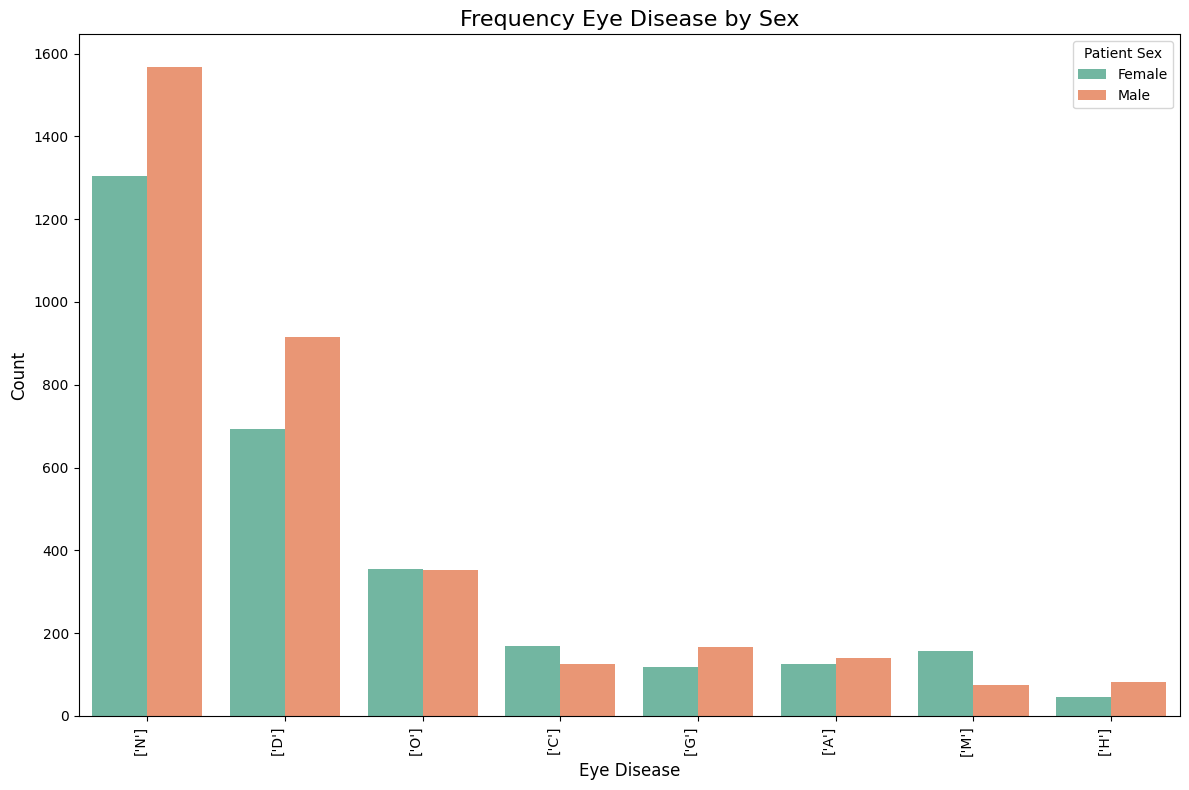

In [78]:
df_exploded = df.explode('labels')


plt.figure(figsize=(12, 8))


sns.countplot(data=df_exploded, x='labels', hue='Patient Sex', palette='Set2', order=df_exploded['labels'].value_counts().index)

plt.title("Frequency Eye Disease by Sex", fontsize=16)
plt.xlabel("Eye Disease", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()
